In [ ]:
!pip install category_encodersencodersencodersencoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
df = pd.read_csv("/content/heart_disease_data.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

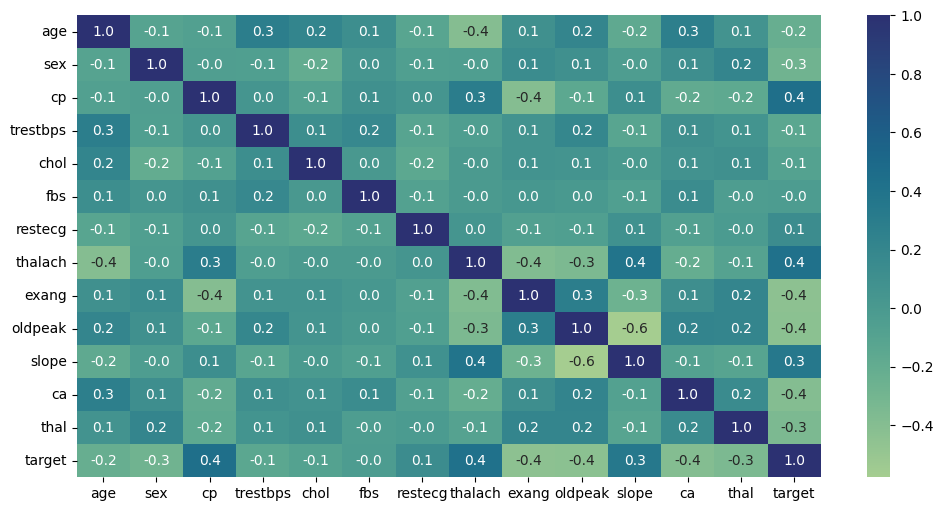

In [ ]:
corr=df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr,annot = True, fmt='.1f',cmap="crest")

In [ ]:
X=df.drop(columns = ["exang"])
Y=df.exang

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
model = make_pipeline(
    OneHotEncoder(),
    LogisticRegression(max_iter=1000,solver="liblinear")
)

model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [ ]:
model.score(X_test,y_test)

0.8709677419354839

In [ ]:
features = model.named_steps["onehotencoder"].get_feature_names_out()
importances = model.named_steps["logisticregression"].coef_[0]

In [ ]:
features

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [ ]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

target     0.503754
cp         0.506526
ca         0.694838
slope      0.856193
restecg    0.869509
dtype: float64

<Axes: >

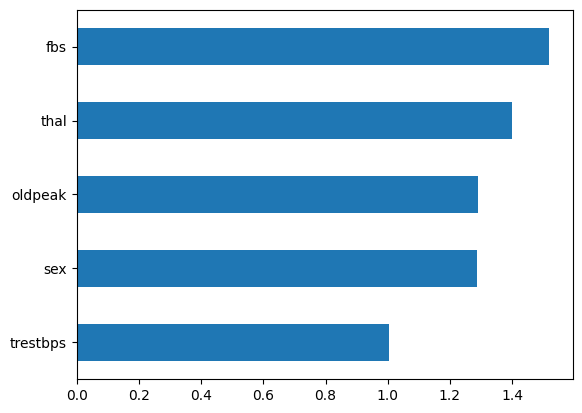

In [ ]:
odds_ratios.tail().plot(kind="barh")

<Axes: >

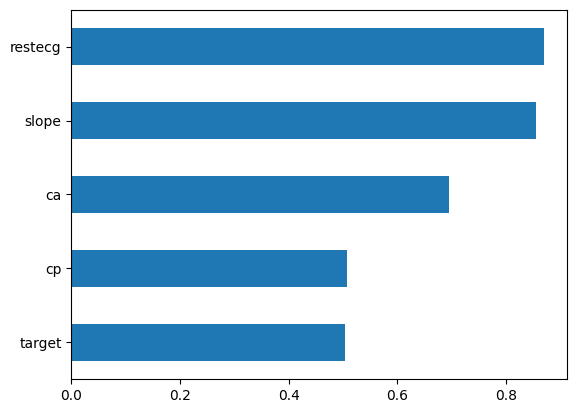

In [ ]:
odds_ratios.head().plot(kind="barh")

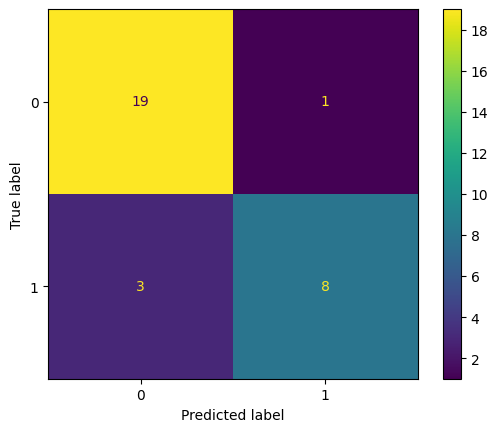

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [ ]:
probabilities = model.predict_proba(X_test)[:, 1]
default_predictions = (probabilities >= 0.5).astype(int)
default_cm = confusion_matrix(y_test, default_predictions)
print("Confusion Matrix (Default Threshold 0.5):")
print(default_cm)

# Adjust threshold to 0.7
adjusted_threshold = 0.7
adjusted_predictions = (probabilities >= adjusted_threshold).astype(int)
adjusted_cm = confusion_matrix(y_test, adjusted_predictions)
print("\nConfusion Matrix (Adjusted Threshold 0.7):")
print(adjusted_cm)

Confusion Matrix (Default Threshold 0.5):
[[19  1]
 [ 3  8]]

Confusion Matrix (Adjusted Threshold 0.7):
[[20  0]
 [10  1]]
